# k近邻

## 概述

kNN算法概述：通过计算不用样本之间特征的距离值来对样本进行分类、回归；

## 特点

* 优点：
    1. 精度高；
    2. 异常值不敏感（因为只取结果中的k个，所以异常值不会纳入最终的计算中）；
    3. 无输入假设；
    4. 无训练时间；
    5. 结果一致（同一个数据集、同一个待预测数据，不管执行多少次算法，结果都是一样的）；
* 缺点：
    1. 时间复杂度高（每个预测的样本均需要与所有训练集中的数据一一计算距离）；
    2. 空间复杂度高（加载大量数据到内存中供计算使用）；

## 算法流程

算法流程：
	1. 拿到一组携带有目标变量的训练样本；
	2. 循环计算某个样本与所有目标变量的特征距离（欧氏距离、曼哈顿距离等）；
	3. 取距离最短的k个样本目标变量（k一般不大于20）；
	4. 将k个中出现最多的分类项作为对该样本的预测值（分类问题，细化可能会加入权重等先验假设）；

## 算法实现

In [1]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
import math
import os

%matplotlib inline

### 数据导入

In [2]:
def createDataSet():
    group = np.array([[1.,1.1],[1.,1.],[0.,0.],[0.,0.1]])
    labels = ['A','A','B','B']
    return group, labels

### 数据可视化

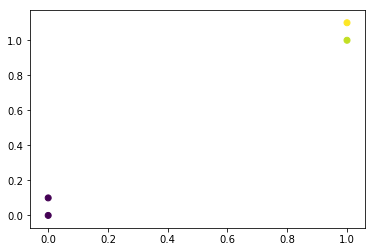

In [3]:
group, labels = createDataSet()
plt.scatter(group[:,0],group[:,1],marker=(9, 3, 30),c=[g[0]*g[1] for g in group])

### kNN算法

In [4]:
def classify0(intX, dataSet, labels, k):
    # 计算距离：欧式距离
    distances = [math.sqrt(sum([(intX[i]-data[i])**2 for i in range(len(data))]))for data in dataSet]
    # 排序
    dist_label = np.array([[distances[i], labels[i]] for i in range(len(labels))])
    dist_label = dist_label[np.argsort(dist_label[:,0])]
    # 取到k个距离最短的
    k_item = dist_label[:k]
    # 取到k个中类别最多的项
    vc = pd.value_counts(k_item[:,1], sort=False)
    return vc.sort_values().index[-1]

### 测试kNN算法

In [5]:
print '[0.1,0.1]:'+str(classify0(np.array([0.1,0.1]),group,labels,3))
print '[0.6,0.8]:'+str(classify0(np.array([0.6,0.8]),group,labels,3))
print '[0.5,0.4]:'+str(classify0(np.array([0.5,0.4]),group,labels,3))

[0.1,0.1]:B
[0.6,0.8]:A
[0.5,0.4]:B


## 示例：使用kNN改善约会网站的配对效果

### 从文件中加载数据

In [6]:
dateSet = np.loadtxt('../datas/datingTestSet2.txt', delimiter='\t')
dateGroup = dateSet[:,[0,1,2]]
dateLabels = dateSet[:,-1]

* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数

### 分析数据

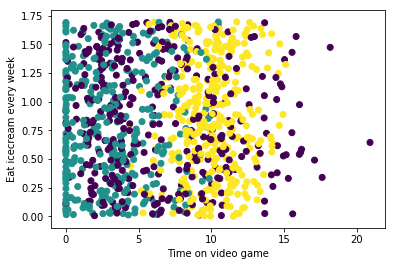

In [7]:
plt.xlabel('Time on video game')
plt.ylabel('Eat icecream every week')
plt.scatter(dateGroup[:,1],dateGroup[:,2],marker=(9, 3, 30),c=[label*1. for label in dateLabels])

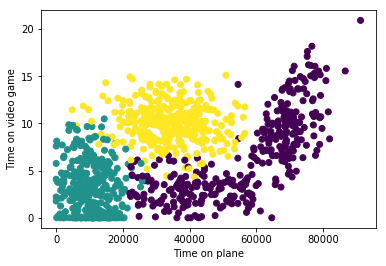

In [8]:
plt.ylabel('Time on video game')
plt.xlabel('Time on plane')
dontLikeDateGroup = dateGroup[dateLabels==1.]
dontLikeDateLabels = dateLabels[dateLabels==1.]
justSoSoDateGroup = dateGroup[dateLabels==2.]
justSoSoDateLabels = dateLabels[dateLabels==2.]
veryLikeDateGroup = dateGroup[dateLabels==3.]
veryLikeDateLabels = dateLabels[dateLabels==3.]
#plt.scatter(dontLikeDateGroup[:,0],dontLikeDateGroup[:,1],marker=(9, 3, 30),c=[label*0. for label in dontLikeDateLabels],label='dont like')
#plt.scatter(justSoSoDateGroup[:,0],justSoSoDateGroup[:,1],marker=(9, 3, 30),c=[label*0. for label in justSoSoDateLabels],label='just so so')
#plt.scatter(veryLikeDateGroup[:,0],veryLikeDateGroup[:,1],marker=(9, 3, 30),c=[label*0. for label in veryLikeDateLabels],label='very like')
plt.scatter(dateGroup[:,0],dateGroup[:,1],marker=(9, 3, 30),c=[label*1. for label in dateLabels])

Woooh!能够看到，使用特征1,2可视化数据时，能够看到一个非常明显的数据边界，而使用特征2,3时，无明显的边界，各种数据混杂在一起；

这种数据明显分为不同组且数据量不大的情况，对于KNN是非常有利的，KNN就是在小数据量、分类明确的的数据集上表现良好。

### 数据归一化

In [9]:
# 归一化是为了去掉因为数值本身的范围大小导致对结果的影响（也就是默认每个特征的权重都是一样的）
def autoNorm(dataSet):
    min_ = dataSet.min(axis=0) # 一维数组代表每个特征的最小值
    max_ = dataSet.max(axis=0) # 一维数组代表每个特征的最大值
    range_ = max_- min_ # 一维数据代表每个特征的range

    min_m = np.tile(min_,(dataSet.shape[0],1)) # 重复次数，每行数量不变，列的数量由1变为dataSet的列长度，也就是shape[1]
    range_m = np.tile(range_,(dataSet.shape[0],1))
    return (dataSet - min_m) / range_m, range_, min_

In [10]:
normDateGroup, range_m, min_m = autoNorm(dateGroup)
normDateGroup

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

### 测试算法:作为完整程序验证分类器

In [11]:
def dateClassTest():
    ratio = 0.1
    testNormDateGroup = normDateGroup[int(len(normDateGroup)*(1-ratio)):]
    trainNormDateGroup = normDateGroup[:int(len(normDateGroup)*(1-ratio))]
    testDateLabels = dateLabels[int(len(normDateGroup)*(1-ratio)):]
    trainDateLabels = dateLabels[:int(len(normDateGroup)*(1-ratio))]
    print 'Score:'+str(1.*sum([1 if classify0(testNormDateGroup[i],trainNormDateGroup,trainDateLabels,15)==testDateLabels[i] else 0 for i in range(len(testNormDateGroup))])/len(testNormDateGroup))

In [12]:
dateClassTest()

Score:0.92


### 使用算法:构建完整可用系统

In [13]:
def classifyPerson():
	planeTime = (float(raw_input('Input your time on plane every year:'))-min_m[0])/range_m[0]
	videoGameTime = (float(raw_input('Input your time on video game every week:'))-min_m[1])/range_m[1]
	iceCreamCount = (float(raw_input('Input your icecream count every week:'))-min_m[2])/range_m[2]
	print planeTime
	result = ['dont like','just so so','very like']
	print 'Person status:'+result[int(classify0(np.array([planeTime,videoGameTime,iceCreamCount]),normDateGroup,dateLabels,15))-1]

In [14]:
classifyPerson()

Input your time on plane every year:1000
Input your time on video game every week:15
Input your icecream count every week:5
0.0109561425613
Person status:very like


## 示例：手写识别系统

### 加载数据

In [15]:
def img2vector(filename):
    returnVct = np.zeros((1,1024))
    with open(filename) as f:
        for i in range(32):
            lineStr = f.readline()
            for j in range(32):
                returnVct[0,32*i+j]=int(lineStr[j])
    return returnVct[0]

In [16]:
print img2vector('../datas/digits/trainingDigits/0_0.txt')

[ 0.  0.  0. ...,  0.  0.  0.]


### 测试算法:使用 k-近邻算法识别手写数字

In [18]:
def handwritingClassTest():
    """
    0. 将所有训练集的文件转换成vector保存下来（这样做时间成本较低，但不确定空间成本是否够用，暂时先这样处理，如果空间不够，则在每次循环中动态获取vector，这样做会慢很多，因为要io）
    0. 将文件名转成labels保存
    1. 循环遍历所有测试集中的文件
    2. 文件名就是target，打印
    3. 将文件转换成vector
    4. 调用classify0方法进行预测
    5. 打印预测结果
    6. 统计到count中
    7. 循环结束后，根据count以及命中数计算Score
    """
    trainGroup = []
    trainLabels = []
    for fn in os.listdir('../datas/digits/trainingDigits'):
        number,time = fn[:fn.find('.')].split('_') # number表示该文件代表的数字，time表示是第几个该数字的训练图
        trainLabels.append(str(number))
        trainGroup.append(img2vector('../datas/digits/trainingDigits'+'/'+fn))
    trainGroup = np.array(trainGroup)
    
    rights=0
    count=0
    for fn in os.listdir('../datas/digits/testDigits'):
        number,time = fn[:fn.find('.')].split('_') # number表示该文件代表的数字，time表示是第几个该数字的训练图
        testVct = np.array(img2vector('../datas/digits/testDigits'+'/'+fn))
        predLabel = classify0(testVct, trainGroup, trainLabels, 15)
        if str(number) == str(predLabel):
            rights+=1
        else:
            print 'Error Case:Test '+str(number)+','+'Pred '+str(predLabel)
        count+=1
        if count==100:
            break
    
    print 'Score:'+str(1.*rights/count)

In [20]:
handwritingClassTest()

Score:1.0


## 小结

kNN是一种基于实例的算法，缺点是空间、时间复杂度高，实际应用空间不大，另一个缺陷是它无法给出任何数据的基础结构信息,因此我们也无法知晓平均
实例样本和典型实例样本具有什么特征；